In [479]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [385]:
train = pd.read_csv('credit_train.csv')
train.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [386]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [387]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [388]:
train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [389]:
train.dropna(subset=['Loan ID'],inplace=True)
train.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [390]:
train.drop(["Loan ID","Customer ID"], axis =1, inplace = True)

In [391]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(18)

,Total,%
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0
Home Ownership,0,0.0
Current Loan Amount,0,0.0
Term,0,0.0


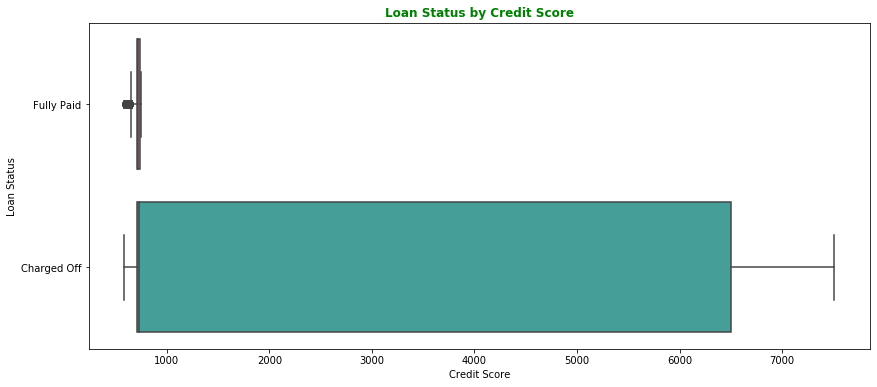

In [392]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Credit Score', y='Loan Status' , data=train, palette = sns.color_palette("husl", 2)).set_title('Loan Status by Credit Score', fontsize=12, weight='bold', c='g');

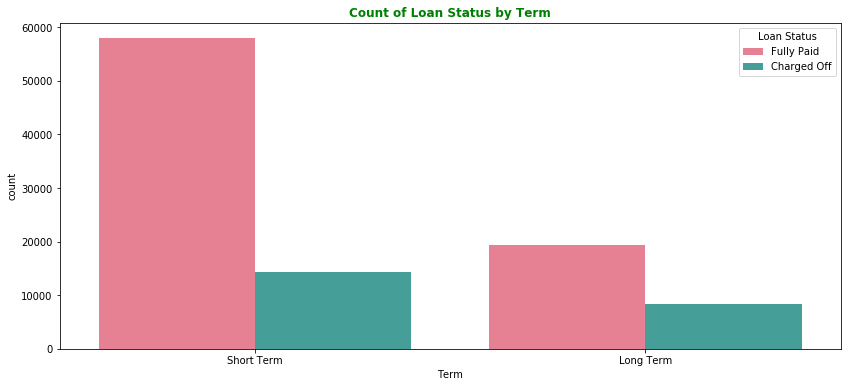

In [393]:
plt.figure(figsize=(14,6))
sns.countplot(x='Term',hue="Loan Status", data=train,palette = sns.color_palette("husl", 2)).set_title('Count of Loan Status by Term', fontsize=12, weight='bold', c='g');

In [394]:
train[['Loan Status']]= train['Loan Status'].map({'Fully Paid':1, 'Charged Off':0})

In [395]:
train[['Term']]= train['Term'].map({'Long Term':1, 'Short Term':0})

In [396]:
train[['Home Ownership']]= train['Home Ownership'].map({'Home Mortgage':'Home Mortgage', 'Own Home':'Own Home', 'Rent':'Rent', 'HaveMortgage':'Home Mortgage'})

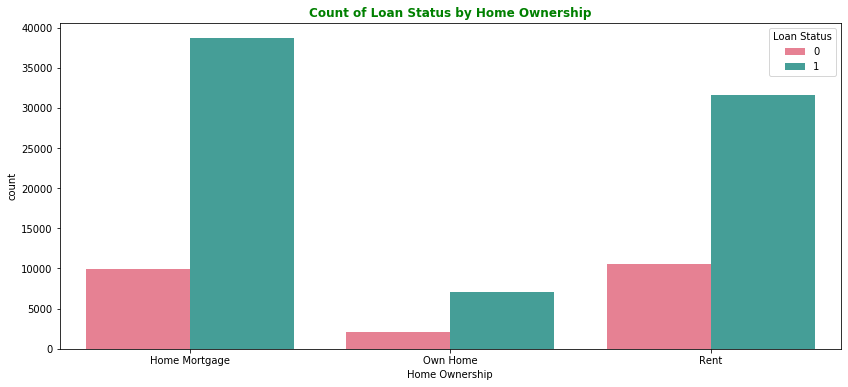

In [397]:
plt.figure(figsize=(14,6))
sns.countplot(x='Home Ownership',hue="Loan Status", data=train,palette = sns.color_palette("husl", 2)).set_title('Count of Loan Status by Home Ownership', fontsize=12, weight='bold', c='g');

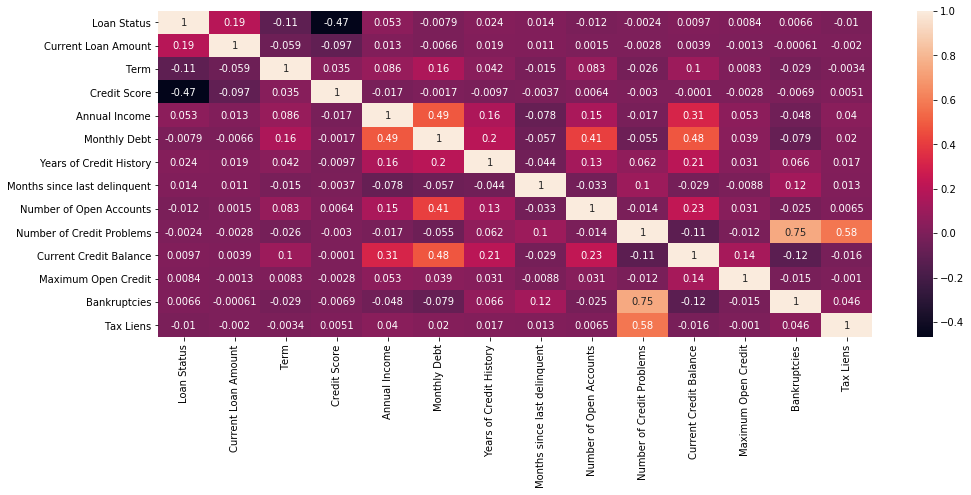

In [398]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),annot=True)

In [399]:
train = pd.get_dummies(train, columns=['Term'],drop_first=True)

Text(0.5, 1.0, 'Monthly Debt by Annual Income')

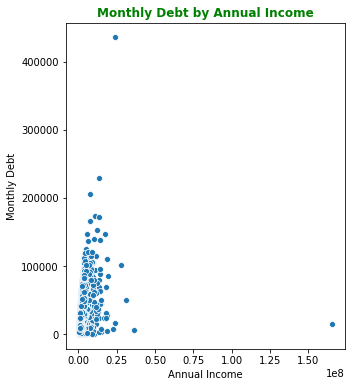

In [400]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=train, x="Annual Income", y="Monthly Debt").set_title('Monthly Debt by Annual Income', fontsize=12, weight='bold', c='g')

In [401]:
train['Years in current job'].value_counts()


10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [402]:
data = [train]

for dataset in data:
    mean = train["Annual Income"].mean()
    std = train["Annual Income"].std()
    is_null = dataset["Annual Income"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_Annual_Income = np.random.normal(mean , std )
    # fill NaN values in Annual Income column with random values generated
    Annual_Income_slice = dataset["Annual Income"].copy()
    Annual_Income_slice[np.isnan(Annual_Income_slice)] = rand_Annual_Income
    dataset["Annual Income"] = Annual_Income_slice
    dataset["Annual Income"] = train["Annual Income"].astype(int)
train["Annual Income"].isnull().sum()

0

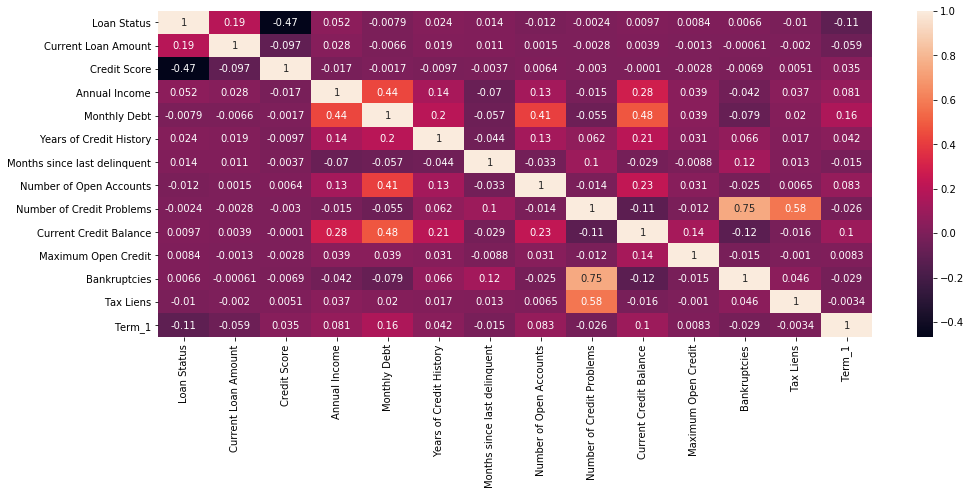

In [403]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),annot=True)

In [404]:
train[['Years in current job']]= train['Years in current job'].map({'8 years':8, '3 years':3, '5 years':5,'2 years':2, '10+ years': 10, 
                                            '< 1 year':0.5,'4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})

In [405]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  int64  
 1   Current Loan Amount           100000 non-null  float64
 2   Credit Score                  80846 non-null   float64
 3   Annual Income                 100000 non-null  int32  
 4   Years in current job          95778 non-null   float64
 5   Home Ownership                100000 non-null  object 
 6   Purpose                       100000 non-null  object 
 7   Monthly Debt                  100000 non-null  float64
 8   Years of Credit History       100000 non-null  float64
 9   Months since last delinquent  46859 non-null   float64
 10  Number of Open Accounts       100000 non-null  float64
 11  Number of Credit Problems     100000 non-null  float64
 12  Current Credit Balance        100000 non-null

In [406]:
data = [train]

for dataset in data:
    mean = train["Years in current job"].mean()
    std = train["Years in current job"].std()
    is_null = dataset["Years in current job"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_Years_in_current_job = np.random.randint(mean - std, mean + 2*std, size = is_null)
    # fill NaN values in Years in current job column with random values generated
  
    Years_in_current_job_slice = dataset["Years in current job"].copy()
    Years_in_current_job_slice[np.isnan(Years_in_current_job_slice)] = rand_Years_in_current_job
    dataset["Years in current job"] = Years_in_current_job_slice
    dataset["Years in current job"] = train["Years in current job"].astype(int)
    train["Years in current job"].isnull().sum()

In [407]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(18)

,Total,%
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0
Term_1,0,0.0
Home Ownership,0,0.0
Current Loan Amount,0,0.0
Annual Income,0,0.0
Years in current job,0,0.0


In [408]:
train

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1
0,1,445412.0,709.0,1167493,8,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0
1,1,262328.0,NaN,1165365,10,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,1,99999999.0,741.0,2231892,8,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,1,347666.0,721.0,806949,3,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,1,176220.0,NaN,1165365,5,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,147070.0,725.0,475437,7,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0,0
99996,1,99999999.0,732.0,1289416,1,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,0
99997,1,103136.0,742.0,1150545,6,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,0
99998,1,530332.0,746.0,1717524,9,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0,0


In [409]:
train.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1
count,100000.000000,1.000000e+05,80846.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000,100000.000000
mean,0.773610,1.176045e+07,1076.456089,1.337495e+06,5.941800,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313,0.277920
std,0.418496,3.178394e+07,1475.403791,9.759006e+05,3.620962,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182,0.447976
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,1.796520e+05,705.000000,9.311805e+05,3.000000,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000,0.000000
50%,1.000000,3.122460e+05,724.000000,1.165365e+06,6.000000,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000,0.000000
75%,1.000000,5.249420e+05,741.000000,1.512704e+06,10.000000,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000,1.000000
max,1.000000,1.000000e+08,7510.000000,1.655574e+08,12.000000,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.000000


In [410]:
train.drop(["Monthly Debt","Months since last delinquent","Purpose"], axis =1, inplace = True)

In [411]:
train

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1
0,1,445412.0,709.0,1167493,8,Home Mortgage,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0
1,1,262328.0,NaN,1165365,10,Home Mortgage,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,1,99999999.0,741.0,2231892,8,Own Home,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,1,347666.0,721.0,806949,3,Own Home,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,1,176220.0,NaN,1165365,5,Rent,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,147070.0,725.0,475437,7,Own Home,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,0
99996,1,99999999.0,732.0,1289416,1,Rent,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,0
99997,1,103136.0,742.0,1150545,6,Rent,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,0
99998,1,530332.0,746.0,1717524,9,Rent,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0


In [412]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(18)

,Total,%
Credit Score,19154,19.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0
Term_1,0,0.0
Current Credit Balance,0,0.0
Number of Credit Problems,0,0.0
Number of Open Accounts,0,0.0
Years of Credit History,0,0.0
Home Ownership,0,0.0


In [413]:
bnkr_null_tab=train[train['Bankruptcies'].isnull()]

In [414]:
bnkr_null_tab['Number of Credit Problems'].value_counts()

0.0    196
1.0      8
Name: Number of Credit Problems, dtype: int64

In [415]:
data = [train]

for dataset in data:
    dataset['Bankruptcies'] = dataset['Bankruptcies'].fillna(0)

In [416]:
data = [train]

for dataset in data:
    dataset['Maximum Open Credit'] = dataset['Maximum Open Credit'].fillna(1)

In [417]:
data = [train]

for dataset in data:
    dataset['Tax Liens'] = dataset['Tax Liens'].fillna(0)

In [418]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(18)

,Total,%
Credit Score,19154,19.2
Term_1,0,0.0
Tax Liens,0,0.0
Bankruptcies,0,0.0
Maximum Open Credit,0,0.0
Current Credit Balance,0,0.0
Number of Credit Problems,0,0.0
Number of Open Accounts,0,0.0
Years of Credit History,0,0.0
Home Ownership,0,0.0


In [419]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  int64  
 1   Current Loan Amount        100000 non-null  float64
 2   Credit Score               80846 non-null   float64
 3   Annual Income              100000 non-null  int32  
 4   Years in current job       100000 non-null  int32  
 5   Home Ownership             100000 non-null  object 
 6   Years of Credit History    100000 non-null  float64
 7   Number of Open Accounts    100000 non-null  float64
 8   Number of Credit Problems  100000 non-null  float64
 9   Current Credit Balance     100000 non-null  float64
 10  Maximum Open Credit        100000 non-null  float64
 11  Bankruptcies               100000 non-null  float64
 12  Tax Liens                  100000 non-null  float64
 13  Term_1                     100

In [420]:
train['Is Score Null']= train['Credit Score'].notna()

In [421]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  int64  
 1   Current Loan Amount        100000 non-null  float64
 2   Credit Score               80846 non-null   float64
 3   Annual Income              100000 non-null  int32  
 4   Years in current job       100000 non-null  int32  
 5   Home Ownership             100000 non-null  object 
 6   Years of Credit History    100000 non-null  float64
 7   Number of Open Accounts    100000 non-null  float64
 8   Number of Credit Problems  100000 non-null  float64
 9   Current Credit Balance     100000 non-null  float64
 10  Maximum Open Credit        100000 non-null  float64
 11  Bankruptcies               100000 non-null  float64
 12  Tax Liens                  100000 non-null  float64
 13  Term_1                     100

In [422]:
train.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1
count,100000.000000,1.000000e+05,80846.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000,100000.000000
mean,0.773610,1.176045e+07,1076.456089,1.337495e+06,5.941800,18.199141,11.12853,0.168310,2.946374e+05,7.607832e+05,0.117500,0.02931,0.277920
std,0.418496,3.178394e+07,1475.403791,9.759006e+05,3.620962,7.015324,5.00987,0.482705,3.761709e+05,8.384420e+06,0.351105,0.25817,0.447976
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000
25%,1.000000,1.796520e+05,705.000000,9.311805e+05,3.000000,13.500000,8.00000,0.000000,1.126700e+05,2.734325e+05,0.000000,0.00000,0.000000
50%,1.000000,3.122460e+05,724.000000,1.165365e+06,6.000000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.00000,0.000000
75%,1.000000,5.249420e+05,741.000000,1.512704e+06,10.000000,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.00000,1.000000
max,1.000000,1.000000e+08,7510.000000,1.655574e+08,12.000000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.00000,1.000000


In [423]:
train = pd.get_dummies(train, columns=['Home Ownership'],drop_first=True)

In [424]:
train=train.drop(train[train['Annual Income']>25000000].index)

In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                99996 non-null  int64  
 1   Current Loan Amount        99996 non-null  float64
 2   Credit Score               80842 non-null  float64
 3   Annual Income              99996 non-null  int32  
 4   Years in current job       99996 non-null  int32  
 5   Years of Credit History    99996 non-null  float64
 6   Number of Open Accounts    99996 non-null  float64
 7   Number of Credit Problems  99996 non-null  float64
 8   Current Credit Balance     99996 non-null  float64
 9   Maximum Open Credit        99996 non-null  float64
 10  Bankruptcies               99996 non-null  float64
 11  Tax Liens                  99996 non-null  float64
 12  Term_1                     99996 non-null  uint8  
 13  Is Score Null              99996 non-null  boo

In [426]:
train[["Is Score Null"]]= train['Is Score Null'].map({True:1, False:0})

In [427]:
train.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1,Is Score Null,Home Ownership_Own Home,Home Ownership_Rent
count,99996.000000,9.999600e+04,80842.000000,9.999600e+04,99996.000000,99996.000000,99996.000000,99996.000000,9.999600e+04,9.999600e+04,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.773621,1.176089e+07,1076.310000,1.334939e+06,5.941778,18.199266,11.128495,0.168277,2.946225e+05,7.607665e+05,0.117505,0.029271,0.277921,0.808452,0.091814,0.421957
std,0.418489,3.178450e+07,1475.112426,8.090161e+05,3.620940,7.015417,5.009924,0.482562,3.761554e+05,8.384587e+06,0.351112,0.257869,0.447977,0.393521,0.288764,0.493874
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.796520e+05,705.000000,9.311520e+05,3.000000,13.500000,8.000000,0.000000,1.126652e+05,2.734160e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,3.122350e+05,724.000000,1.165365e+06,6.000000,16.900000,10.000000,0.000000,2.097980e+05,4.678740e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,5.249255e+05,741.000000,1.512690e+06,10.000000,21.700000,14.000000,0.000000,3.679398e+05,7.829250e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000e+08,7510.000000,2.416154e+07,12.000000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [428]:
data = [train]

for dataset in data:
    dataset.loc[(dataset['Annual Income'] >= 75000) & (dataset['Annual Income'] <= 150000), 'Annual Income'] = 1
    dataset.loc[(dataset['Annual Income'] > 150000) & (dataset['Annual Income'] <=500000), 'Annual Income']   = 2
    dataset.loc[(dataset['Annual Income'] > 500000) & (dataset['Annual Income'] <= 1000000), 'Annual Income']   = 3
    dataset.loc[(dataset['Annual Income'] > 1000000) & (dataset['Annual Income'] <= 10000000), 'Annual Income']   = 4
    dataset.loc[ dataset['Annual Income'] > 10000000, 'Annual Income'] = 5
    dataset['Annual Income'] = dataset['Annual Income'].astype(int)

In [429]:
data = [train]

for dataset in data:
    dataset['Credit Score'] = dataset['Credit Score'].fillna(0)

In [430]:
train.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_1,Is Score Null,Home Ownership_Own Home,Home Ownership_Rent
count,99996.000000,9.999600e+04,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,9.999600e+04,9.999600e+04,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.773621,1.176089e+07,870.145336,3.664817,5.941778,18.199266,11.128495,0.168277,2.946225e+05,7.607665e+05,0.117505,0.029271,0.277921,0.808452,0.091814,0.421957
std,0.418489,3.178450e+07,1392.317530,0.545327,3.620940,7.015417,5.009924,0.482562,3.761554e+05,8.384587e+06,0.351112,0.257869,0.447977,0.393521,0.288764,0.493874
min,0.000000,1.080200e+04,0.000000,1.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.796520e+05,671.000000,3.000000,3.000000,13.500000,8.000000,0.000000,1.126652e+05,2.734160e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,3.122350e+05,717.000000,4.000000,6.000000,16.900000,10.000000,0.000000,2.097980e+05,4.678740e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,5.249255e+05,738.000000,4.000000,10.000000,21.700000,14.000000,0.000000,3.679398e+05,7.829250e+05,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000e+08,7510.000000,5.000000,12.000000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.000000,1.000000,1.000000,1.000000


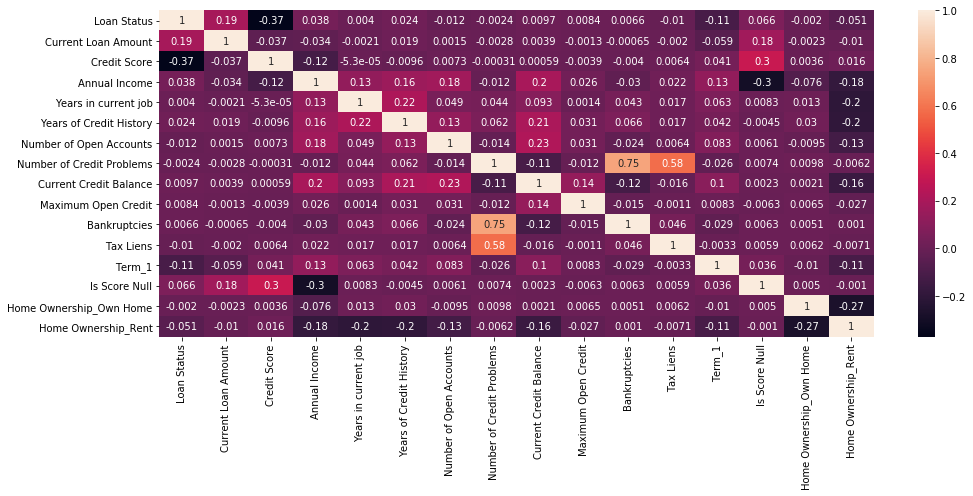

In [431]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),annot=True)

In [432]:
train[['Current Loan Amount']]= np.log(train['Current Loan Amount'])
train[['Current Credit Balance']]= np.log(train['Current Credit Balance']+1)
train[['Maximum Open Credit']]= np.log(train['Maximum Open Credit']+1)

In [433]:
y = train['Loan Status'].values
X = train.drop(columns = ['Loan Status'])

In [434]:
#Splitting into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [435]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [436]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [437]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [438]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [440]:
results = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_random_forest, acc_gaussian,
             acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
86.79,KNN
79.64,Naive Bayes


In [449]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)
    

In [450]:
print_scores("KNN;",y_test, knn.predict(X_test))
print_scores("Naive Bayes;",y_test, gaussian.predict(X_test))
print_scores("Decision Tree;",y_test, decision_tree.predict(X_test))
print_scores("Random Forest;",y_test, random_forest.predict(X_test))

KNN;
accuracy:  0.777225907530251
precision:  0.8220203516706305
recall:  0.908714765968451
f1_score:  0.7583536165474594
Naive Bayes;
accuracy:  0.7961598719957332
precision:  0.8232378646286558
recall:  0.9378070855960693
f1_score:  0.7710394643746028
Decision Tree;
accuracy:  0.7462248741624721
precision:  0.8332549489076061
recall:  0.8399706921817085
f1_score:  0.7449643367033907
Random Forest;
accuracy:  0.8173939131304376
precision:  0.8153063402832136
recall:  0.9876303766916645
f1_score:  0.7745958693853555


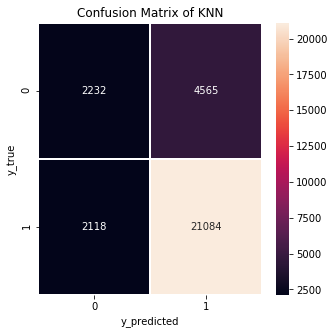

In [451]:
#for KNN
cm_knn = confusion_matrix(y_test,knn.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of KNN")
plt.show()

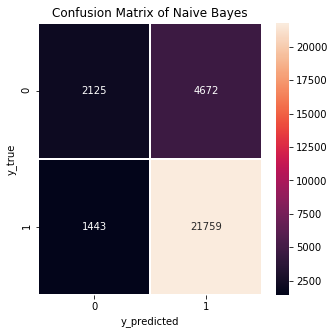

In [458]:
#for gaussian
cm_nb = confusion_matrix(y_test,gaussian.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_nb, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Naive Bayes")
plt.show()

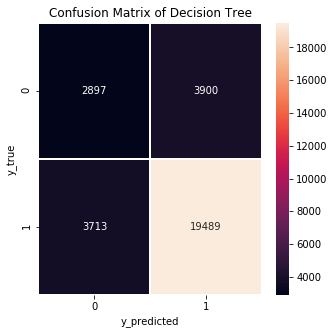

In [459]:
#for decision_tree
cm_dt = confusion_matrix(y_test,decision_tree.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_dt, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

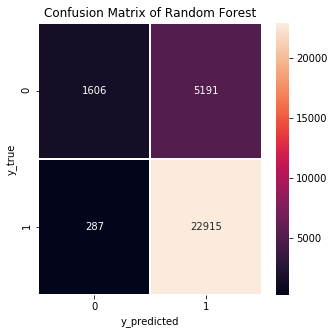

In [460]:
#for random_forest
cm_rf = confusion_matrix(y_test,random_forest.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [463]:
print(np.mean(cross_val_score(knn,X,y,cv=10)))

0.7777612261226122


In [464]:
print(np.mean(cross_val_score(gaussian,X,y,cv=10)))

0.7915215741574156


In [465]:
print(np.mean(cross_val_score(decision_tree,X,y,cv=10)))

0.7586203510351035


In [466]:
print(np.mean(cross_val_score(random_forest,X,y,cv=10)))

0.8181327642764276


In [475]:
# define the parameter values that should be searched
k_range = list(range(1, 30))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [476]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [480]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [481]:
# fit the grid with data
grid.fit(X, y);

In [482]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.78049793, 0.74572275, 0.76930475, 0.77969329, 0.74661343,
        0.74182701, 0.76752045, 0.78328552, 0.83598332, 0.78989577,
        0.8064857 , 0.79092536, 0.79262447, 0.84969296, 0.78364537,
        0.79387696, 0.79044859, 0.78452504, 0.80995235, 0.82019017,
        0.79030306, 0.79239619, 0.74071317, 0.74856644, 0.75973661,
        0.78747683, 0.78973956, 0.77104757, 0.77852211]),
 'std_fit_time': array([0.02486349, 0.03833079, 0.04056988, 0.04341575, 0.05135319,
        0.04495263, 0.03967932, 0.05200221, 0.05211073, 0.04883573,
        0.05126154, 0.06175816, 0.04664323, 0.11271743, 0.04476574,
        0.05365216, 0.02495922, 0.08428743, 0.06706637, 0.07449589,
        0.05471966, 0.04960435, 0.03211585, 0.06133737, 0.03499772,
        0.08934818, 0.09716766, 0.04051618, 0.03257639]),
 'mean_score_time': array([0.54088349, 0.66386271, 0.7235249 , 0.78169117, 0.79092574,
        0.78929584, 0.84435208, 0.87899961, 0.89740603, 0.92166269,
        0.953376

In [494]:
# examine the best model
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (best_k, model_grid.cv_results_['mean_test_score'][best_k], model_grid.cv_results_['std_test_score'][best_k])

get_best_model(grid)

27 0.8178827542754276 0.002427149207541349


In [509]:
grid.best_params_

{'n_neighbors': 29}

In [485]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
clf.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [486]:
clf.cv_results_

{'mean_fit_time': array([0.15264227, 0.17992034, 0.21523335, 0.24035492, 0.27047629,
        0.30061741, 0.32649479, 0.35507786, 0.38249686, 0.47979791,
        0.57182777, 0.67092624, 0.70178061, 0.69403124, 0.68296883,
        0.68416398, 0.6796895 , 0.67818236, 0.17404578, 0.21882248,
        0.25422549, 0.30532236, 0.34067144, 0.36891274, 0.45767906,
        0.46865613, 0.49651108, 0.63217967, 0.77692058, 0.94337106,
        0.96182532, 0.97434602, 0.9936466 , 0.94493058, 0.96928651,
        1.00591905]),
 'std_fit_time': array([0.00273032, 0.00229441, 0.00769655, 0.00275795, 0.00266865,
        0.00815981, 0.00408375, 0.00823157, 0.00683588, 0.01421119,
        0.00834964, 0.01202675, 0.04058132, 0.01323159, 0.01170708,
        0.02250009, 0.00655307, 0.01065608, 0.00521365, 0.00841841,
        0.00809465, 0.01761027, 0.01299818, 0.00315304, 0.01734348,
        0.01689336, 0.00848383, 0.01550792, 0.00893613, 0.03150946,
        0.02215226, 0.02143704, 0.03211011, 0.01554041, 0.020

In [495]:
get_best_model(clf)

1 0.819112800280028 0.0022580991266133656


In [511]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [503]:
parameters = { 
    'n_estimators': [10, 50],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [504]:
crf = GridSearchCV(RandomForestClassifier(),param_grid=parameters, cv=10)
crf.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [506]:
crf.cv_results_

{'mean_fit_time': array([0.29082184, 1.38667955, 0.34209051, 1.64729662, 0.38710566,
        1.87666862, 0.44202332, 2.1318841 , 0.46750083, 2.32936773,
        0.35505421, 1.67789903, 0.41918275, 1.95801277, 0.48120978,
        2.35183959, 0.53238325, 2.63253741, 0.58804772, 3.26896722]),
 'std_fit_time': array([0.01793646, 0.05080176, 0.01081633, 0.02782506, 0.00889751,
        0.03146806, 0.02019092, 0.02807862, 0.01403254, 0.03706522,
        0.01119749, 0.06713133, 0.01657409, 0.06960672, 0.02410648,
        0.05026533, 0.0331886 , 0.03827928, 0.03603647, 0.35512183]),
 'mean_score_time': array([0.00698152, 0.02662706, 0.00738077, 0.02892642, 0.00738339,
        0.0309176 , 0.00837729, 0.03340564, 0.00913382, 0.03650229,
        0.00688181, 0.02612963, 0.00728064, 0.02822435, 0.0077795 ,
        0.03151658, 0.00827761, 0.03370988, 0.00877671, 0.0405858 ]),
 'std_score_time': array([0.00063075, 0.00089726, 0.00048897, 0.00133816, 0.00049435,
        0.00044574, 0.0004881 , 0.000493

In [508]:
crf.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 10}

In [510]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [512]:
decision_tree = DecisionTreeClassifier(max_depth=4) 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [513]:
random_forest = RandomForestClassifier(n_estimators=10,max_depth=7)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [515]:
results = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [ acc_knn, 
              acc_random_forest, 
             acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Model
Score,
82.00,KNN
81.94,Random Forest
81.94,Decision Tree


In [516]:
print_scores("KNN;",y_test, knn.predict(X_test))
print_scores("Naive Bayes;",y_test, gaussian.predict(X_test))
print_scores("Decision Tree;",y_test, decision_tree.predict(X_test))
print_scores("Random Forest;",y_test, random_forest.predict(X_test))

KNN;
accuracy:  0.8183606120204007
precision:  0.8108127035260339
recall:  0.9980174122920438
f1_score:  0.7686946607444257
Naive Bayes;
accuracy:  0.7961598719957332
precision:  0.8232378646286558
recall:  0.9378070855960693
f1_score:  0.7710394643746028
Decision Tree;
accuracy:  0.8185272842428081
precision:  0.8099560148013685
recall:  1.0
f1_score:  0.7674448714144287
Random Forest;
accuracy:  0.8185606186872896
precision:  0.8099842904520859
recall:  1.0
f1_score:  0.7675045874489811


In [517]:
print(np.mean(cross_val_score(knn,X,y,cv=10)))

0.8185227842784277


In [518]:
print(np.mean(cross_val_score(decision_tree,X,y,cv=10)))

0.819112800280028


In [519]:
print(np.mean(cross_val_score(random_forest,X,y,cv=10)))

0.819122799279928


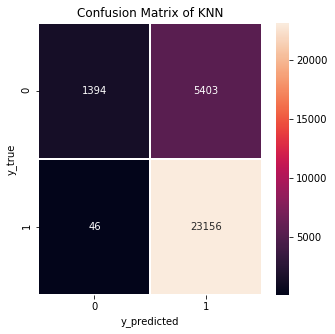

In [520]:
#for KNN
cm_knn = confusion_matrix(y_test,knn.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of KNN")
plt.show()

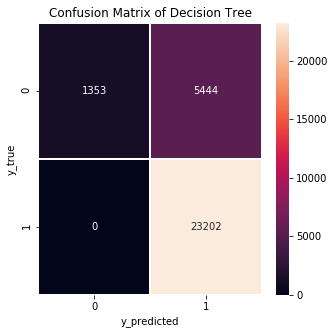

In [521]:
#for decision_tree
cm_dt = confusion_matrix(y_test,decision_tree.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_dt, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Decision Tree")
plt.show()

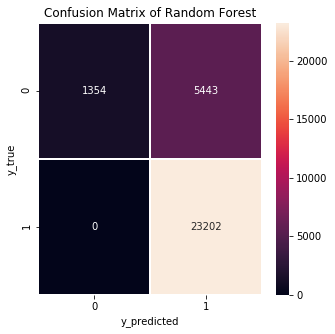

In [522]:
#for random_forest
cm_rf = confusion_matrix(y_test,random_forest.predict(X_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Random Forest")
plt.show()

In [529]:
print(knn.predict(X.loc[[42]]))

[1]


In [542]:
print(random_forest.predict(X.loc[[43]]))

[0]
